In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.dates
from matplotlib.finance import candlestick_ohlc
import pandas as pd
import datetime
import numpy as np
import urllib
import datetime as dt
from matplotlib import style
import datetime

In [116]:
# def bytespdate2num(fmt, encoding='utf-8'):
#     strconverter = mdates.strpdate2num(fmt)
#     def bytesconverter(b):
#         s = b.decode(encoding)
#         return strconverter(s)
#     return bytesconverter    

stock_price_url='http://chartapi.finance.yahoo.com/instrument/1.0/AUDUSD=X/chartdata;type=quote;range=2d/csv'
#stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=5/csv'
source_code =  urllib.request.urlopen(stock_price_url).read().decode()
stock_data = []
split_source = source_code.split('\n')
for line in split_source:
    split_line = line.split(',')
    if len(split_line) == 6:
        if 'values' not in line and 'labels' not in line:
            stock_data.append(line)

global date, closep,highp,lowp,openp,volume
date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                      delimiter=',',
                                                      unpack=True,)
                                                      #converters={0: bytespdate2num('%y%m%d)})
#     print(stock_data)

In [117]:
date_new=[]
for i in range(len(date)):
    date_new.append(datetime.datetime.fromtimestamp(date[i]))
    
market_data={"datetime":pd.Series(date_new),"open":pd.Series(openp),"high":pd.Series(highp),
             "low":pd.Series(lowp),"close":pd.Series(closep)}
data_df=pd.DataFrame(market_data)

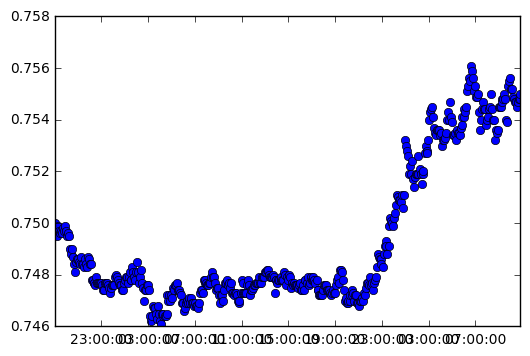

In [118]:
#plt.plot_date(plt.dates.date2num(data_df.datetime),data_df.close)
plt.plot_date(data_df.datetime,data_df.close)
plt.show()


In [119]:
data_df.datetime.head(20)

0    2017-01-15 19:04:00
1    2017-01-15 19:09:29
2    2017-01-15 19:14:00
3    2017-01-15 19:18:00
4    2017-01-15 19:24:00
5    2017-01-15 19:29:30
6    2017-01-15 19:34:30
7    2017-01-15 19:39:00
8    2017-01-15 19:44:30
9    2017-01-15 19:48:00
10   2017-01-15 19:54:31
11   2017-01-15 19:59:31
12   2017-01-15 20:04:01
13   2017-01-15 20:08:31
14   2017-01-15 20:14:31
15   2017-01-15 20:19:31
16   2017-01-15 20:24:31
17   2017-01-15 20:29:32
18   2017-01-15 20:34:32
19   2017-01-15 20:39:02
Name: datetime, dtype: datetime64[ns]

In [120]:
#print(data_df.datetime[1].hour())

type(data_df.datetime[1])

pandas.tslib.Timestamp

In [121]:
print(datetime.datetime.today()-data_df.datetime[1])


1 days 15:43:52.785070


In [122]:
print(data_df.datetime[1].hour)

19


In [88]:
last_time=datetime.datetime.now()
data_hourly=pd.DataFrame(data=None,columns=data_df.columns)
data_daily=data_df.copy(deep=False)
for index in reversed(data_df.index):
    if last_time!=data_df.datetime[index].hour:
        print(last_time)        
        last_time=data_df.datetime[index].hour
        data_hourly=data_hourly.append(data_df.loc[index],ignore_index=True)
        print(data_df.loc[index])
        print(last_time,"\n")
    
        

2017-01-16 15:46:51.703962
close                    0.7483
datetime    2017-01-15 20:44:00
high                     0.7482
low                      0.7486
open                     0.7486
Name: 288, dtype: object
20 

20
close                    0.7497
datetime    2017-01-15 19:59:31
high                     0.7497
low                        0.75
open                       0.75
Name: 279, dtype: object
19 

19
close                    0.7509
datetime    2017-01-13 18:08:00
high                     0.7506
low                      0.7509
open                     0.7506
Name: 267, dtype: object
18 

18
close                    0.7511
datetime    2017-01-13 17:12:00
high                     0.7511
low                      0.7511
open                     0.7511
Name: 266, dtype: object
17 

17
close                    0.7502
datetime    2017-01-13 16:59:21
high                     0.7501
low                      0.7506
open                     0.7504
Name: 263, dtype: object
16 

16
close   

In [89]:
data_hourly.head(10)

,close,datetime,high,low,open
0,0.7483,2017-01-15 20:44:00,0.7482,0.7486,0.7486
1,0.7497,2017-01-15 19:59:31,0.7497,0.7500,0.7500
2,0.7509,2017-01-13 18:08:00,0.7506,0.7509,0.7506
3,0.7511,2017-01-13 17:12:00,0.7511,0.7511,0.7511
4,0.7502,2017-01-13 16:59:21,0.7501,0.7506,0.7504
5,0.7501,2017-01-13 15:59:50,0.7500,0.7503,0.7502
6,0.7504,2017-01-13 14:59:48,0.7502,0.7505,0.7504
7,0.7488,2017-01-13 13:59:47,0.7488,0.7491,0.7489
8,0.7487,2017-01-13 12:59:15,0.7487,0.7491,0.7490
9,0.7483,2017-01-13 11:59:14,0.7482,0.7486,0.7482


In [123]:
last_time=datetime.datetime.now()
data_hourly=pd.DataFrame(data=None,columns=data_df.columns)
data_daily=pd.DataFrame(data=None,columns=data_df.columns)
data_temp=pd.DataFrame(data=None,columns=data_df.columns)
hourly_open=0
hourly_close=0
hourly_high=0
hourly_low=99999
open_bool=True
for index in reversed(data_df.index):
    if last_time==data_df.datetime[index].hour:
        if open_bool:
            hourly_close=data_df.close[index]
            open_bool=False
        if data_df.high[index]>hourly_high:
            hourly_high=data_df.high[index]
        if data_df.low[index]<hourly_low:
            hourly_low=data_df.low[index]
    else:
        hourly_open=data_df.open[index-1]
#         data_temp.set_value(last_time,hourly_open,hourly_high,hourly_low,hourly_close)
        #dict1={last_time,hourly_open,hourly_high,hourly_low,hourly_close}
        data_hourly=data_hourly.append({"datetime":data_df.datetime[index-1],"open":hourly_open,"high":hourly_high,
             "low":hourly_low,"close":hourly_close},ignore_index=True)
        last_time=data_df.datetime[index].hour
        hourly_open=0
        hourly_close=0
        hourly_high=0
        hourly_low=99999
        open_bool=True
                

In [44]:
print(data_df[-1:])

      close            datetime    high     low    open
288  0.7483 2017-01-15 20:44:00  0.7482  0.7486  0.7486


In [124]:
#data_hourly=pd.DataFrame(columns=data_df.columns)
data_hourly.head(50)

,close,datetime,high,low,open
0,0.0000,2017-01-17 10:49:53,0.0000,99999.0000,0.7549
1,0.7548,2017-01-17 09:54:52,0.7551,0.7547,0.7552
2,0.7555,2017-01-17 08:54:50,0.7550,0.7542,0.7537
3,0.7536,2017-01-17 07:54:48,0.7545,0.7538,0.7548
4,0.7538,2017-01-17 06:53:17,0.7549,0.7543,0.7557
5,0.7551,2017-01-17 05:54:16,0.7559,0.7545,0.7540
6,0.7541,2017-01-17 04:54:44,0.7538,0.7536,0.7548
7,0.7541,2017-01-17 03:54:43,0.7541,0.7534,0.7537
8,0.7536,2017-01-17 02:54:41,0.7545,0.7538,0.7529
9,0.7527,2017-01-17 01:54:39,0.7528,0.7520,0.7520


In [86]:
data_hourly.append(data_df.loc[23],ignore_index=True)

,close,datetime,high,low,open
0,0.7505,2017-01-12 20:59:52,0.7501,0.7508,0.7503


In [84]:
data_hourly=pd.DataFrame(data=None,columns=data_df.columns)

In [87]:
data_hourly

,close,datetime,high,low,open
